__Name - Arvind Hemant Bondkar__

#__MultiClass Questions Classification__

Given data was in a text format. So, first of all I convert that into excel format


__Field__

- category
- sub_category
- question

#### Type of Machine Learning Problem
It is a multiclass classification problem. 

#### Performance Metric

- [F1 Score]

#### 1)Loading the data and reading the basic stats. 

In [3]:
import numpy as np 
import pandas as pd 
import re 
import string 
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.util import ngrams

In [4]:
df = pd.read_excel('/content/train.xlsx')

In [5]:
df.head()

,category,sub_category,question
0,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR,exp,What is the full form of .com ?


In [6]:
#Shape of the data
df.shape

(15452, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15452 entries, 0 to 15451
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      15452 non-null  object
 1   sub_category  15452 non-null  object
 2   question      15452 non-null  object
dtypes: object(3)
memory usage: 362.3+ KB


In [8]:
#Checking for null values
df.isna().sum()

category        0
sub_category    0
question        0
dtype: int64

Dataset has not contain any null value.

In [9]:
#Checking the target variable classes 
#Here our target variable is 'category'
df['category'].value_counts()

ENTY    3627
HUM     3424
DESC    3304
NUM     2480
LOC     2376
ABBR     241
Name: category, dtype: int64

ENTY - ENTITY

HUM - HUMAN

DESC - DESCRIBE

NUM - NUMERIC

LOC - LOCATION

ABBR - ABBREVIATION

__Observation:__

- Specificaly, all classes has balance count in dependent variable, except  'Abbriviation' has so much imbalance in count.

In [10]:
# Count values of sub_category column
df['sub_category'].value_counts()

ind          2691
other        2089
def          1221
count         985
desc          911
manner        766
date          650
cremat        595
reason        543
gr            529
country       425
city          376
animal        365
dismed        291
termeq        271
food          266
state         201
period        197
exp           195
money         183
event         173
sport         165
product       130
substance     124
color         119
techmeth      111
dist           86
perc           82
word           71
veh            68
mount          67
title          67
body           54
abb            46
lang           45
plant          38
instru         37
speed          36
volsize        32
symbol         31
letter         30
weight         23
code           22
temp           15
ord            15
religion        9
currency        6
Name: sub_category, dtype: int64

#EDA - Exploratory Data Analysis

#### 1. Distribution of data points among output class

In [11]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

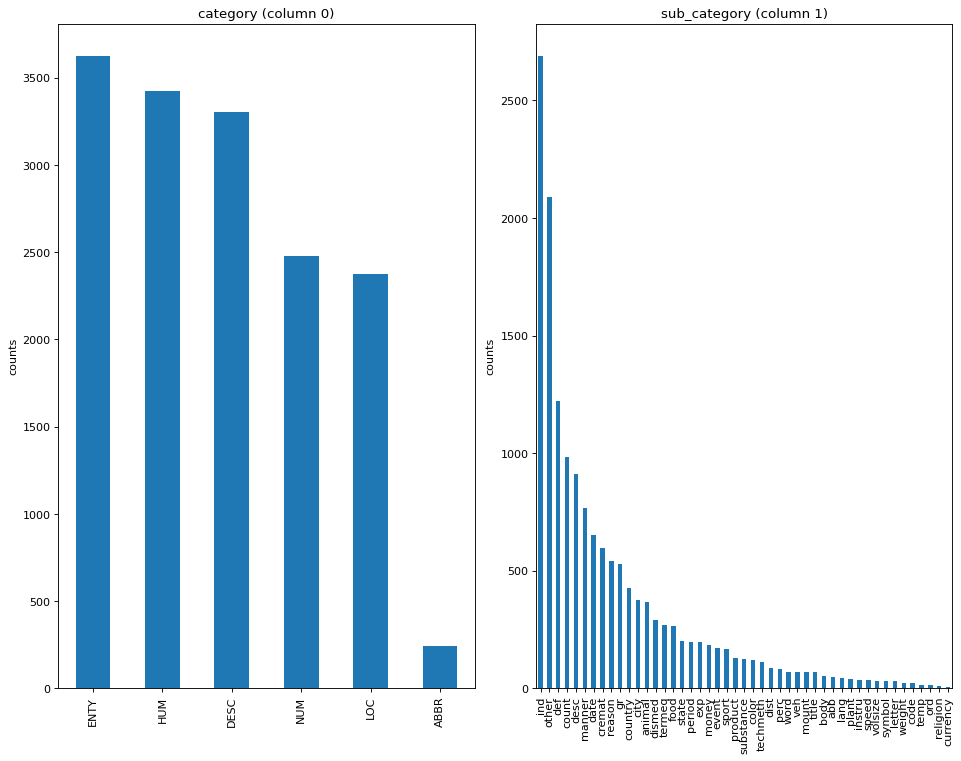

In [12]:
plotPerColumnDistribution(df, 10, 5)

__Observation:__

1. In category column the data is balance for all valriables except ABBR, it has high imbalance count.

2. ind and other has very large count but from the city to currency labels has small count.

The bar chart above shows that our dataset is imbalanced, i.e. the number of observations per class are slightly equally distributed except for __'ABBR'__. However, I decided to use a method called __'Random Oversampling'__. This technique oversamples the minority of data with balance points.

__2. WordCloud of questions.__

In [13]:
def display_wordcloud(data, title):
    words_list = data.unique().tolist()
    words = ' '.join(words_list)
    
    wordcloud = WordCloud(width = 800, height = 400,
                      stopwords = set(STOPWORDS)).generate(words)

    plt.figure(figsize=(20, 12), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Words in {title}')
    plt.axis("off")
    plt.show()

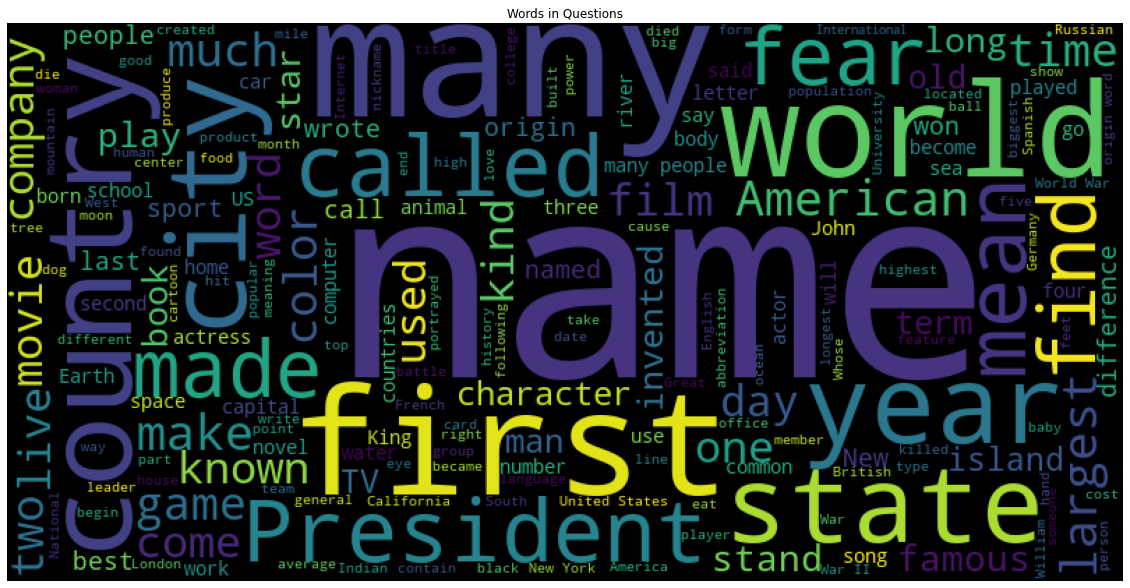

In [14]:
# Wordcloud for Questions
display_wordcloud(df['question'], 'Questions')

__Observation:__

There are name, first, world, state, city, etc. words are mostly used in dataset.

In [15]:
def get_all_symbols(data):
  """
  Returns SET: special symbols in corpus
  """
  
  symbols = []
  for text in data:
    s = re.findall(r'\W+', str(text))
    symbols.extend(s), 
  
  return set(symbols)

In [16]:
extracted_symbols = get_all_symbols(df['question'].values)
print(extracted_symbols)

{" ''", '. , ', '. , ?', ' $ ', " ' `` ", ' $', '-?? ', " . '' ?", " ' ", ' , `` ', " ! '' ?", '=', '. ', " '' ", "'", " . ''", ".. . '' ?", " , '' ", '&', '. ?', '% , ', ' . ', '% ?', ' ?', ' ? ', ' ` ', ' , ` ', " ' ?", ". '", ' : ', ' ; ', ' ; `` ', ' ! ?', " ? ''", " '", '. `` ', ' & ', " '-", ' - ', ' , ?', " ? '' ?", ' `` ', ' #', " ' .", ' `` ...', ' .', ' ,', ' ', ' ? , ', ' : `` ', ' , $', ' , ', '.', ' : `` ... ', '-', " '' ?", '+', ' ! ', '- ', '.-', '% ', " '' .", " . '' ", '/', " ` '", '...', ". '' "}


__Observations:__
- Looks like there are some math questions in the data which contains more special chars and numbers.
- Some questions also contains emojis and non-english characters.
- Presence of punctuations in may add more value to ML models.

#Data Preprocessing & Cleaning 

**1) Lower Casing**

In [17]:
df["question"] = df["question"].str.lower()

**2) Contractions**

In [18]:
! pip install contractions
import contractions
df["question"] = df["question"].apply(lambda x: [contractions.fix(word) for word in x.split()])
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,category,sub_category,question
0,DESC,manner,"[how, did, serfdom, develop, in, and, then, le..."
1,ENTY,cremat,"[what, films, featured, the, character, popeye..."
2,DESC,manner,"[how, can, i, find, a, list, of, celebrities, ..."
3,ENTY,animal,"[what, fowl, grabs, the, spotlight, after, the..."
4,ABBR,exp,"[what, is, the, full, form, of, .com, ?]"


In [19]:
df['question'] = [' '.join(map(str, l)) for l in df['question']]

**3) Removal of Stopwords**

In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["question"] = df["question"].apply(lambda text: remove_stopwords(text))
df.head()

,category,sub_category,question
0,DESC,manner,serfdom develop leave russia ?
1,ENTY,cremat,films featured character popeye doyle ?
2,DESC,manner,find list celebrities ' real names ?
3,ENTY,animal,fowl grabs spotlight chinese year monkey ?
4,ABBR,exp,full form .com ?


**4)Remove Integers from the Text.**

In [22]:
df['question'] = df['question'].str.replace('\d+', '')
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,category,sub_category,question
0,DESC,manner,serfdom develop leave russia ?
1,ENTY,cremat,films featured character popeye doyle ?
2,DESC,manner,find list celebrities ' real names ?
3,ENTY,animal,fowl grabs spotlight chinese year monkey ?
4,ABBR,exp,full form .com ?


**5)Stemming**

In [23]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["question"] = df["question"].apply(lambda text: stem_words(text))
df.head()

,category,sub_category,question
0,DESC,manner,serfdom develop leav russia ?
1,ENTY,cremat,film featur charact popey doyl ?
2,DESC,manner,find list celebr ' real name ?
3,ENTY,animal,fowl grab spotlight chines year monkey ?
4,ABBR,exp,full form .com ?


**6)Lemmatization**

In [24]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["question"] = df["question"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,sub_category,question
0,DESC,manner,serfdom develop leav russia ?
1,ENTY,cremat,film featur charact popey doyl ?
2,DESC,manner,find list celebr ' real name ?
3,ENTY,animal,fowl grab spotlight chine year monkey ?
4,ABBR,exp,full form .com ?


**7)Remove URL from the texts**

In [25]:
df["question"] = df["question"].str.replace(r's*https?://S+(s+|$)', ' ').str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


**8)Remove HTML Tags**

In [26]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df['question']= df['question'].apply(lambda cw : remove_tags(cw))
df.head()

,category,sub_category,question
0,DESC,manner,serfdom develop leav russia ?
1,ENTY,cremat,film featur charact popey doyl ?
2,DESC,manner,find list celebr ' real name ?
3,ENTY,animal,fowl grab spotlight chine year monkey ?
4,ABBR,exp,full form .com ?


##__Spliting the data into train and test__

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = df['question']
y = df['category']

In [36]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.25, random_state= 200, shuffle= True, stratify = y)

In [37]:
print('Training set Shape: {}  | Test set Shape: {}'.format(xtrain.shape, xtest.shape))

Training set Shape: (11589,)  | Test set Shape: (3863,)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tfv = TfidfVectorizer(dtype=np.float32, min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
xv_train = tfv.fit_transform(xtrain)
xv_test = tfv.transform(xtest)

In [40]:
print("Number of data points in train data :",xv_train.shape, ytrain.shape)
print("Number of data points in test data :",xv_test.shape, ytest.shape)

Number of data points in train data : (11589, 15274) (11589,)
Number of data points in test data : (3863, 15274) (3863,)


#__Model Building__

##**Logistic Regression**

In [69]:
#Libraries used for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [43]:
LR = LogisticRegression()
LR.fit(xv_train,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [44]:
#Predition
pred_lr=LR.predict(xv_test)

Test Accuracy using Logistics Regression Classifier:  0.8993010613512814
              precision    recall  f1-score   support

        ABBR       1.00      0.73      0.85        60
        DESC       0.88      0.88      0.88       826
        ENTY       0.89      0.91      0.90       907
         HUM       0.88      0.92      0.90       856
         LOC       0.92      0.88      0.90       594
         NUM       0.95      0.92      0.94       620

    accuracy                           0.90      3863
   macro avg       0.92      0.87      0.89      3863
weighted avg       0.90      0.90      0.90      3863

[[ 44  14   1   0   0   1]
 [  0 727  41  27  15  16]
 [  0  26 821  40  16   4]
 [  0  34  26 785   7   4]
 [  0  20  17  27 525   5]
 [  0   6  17  17   8 572]]


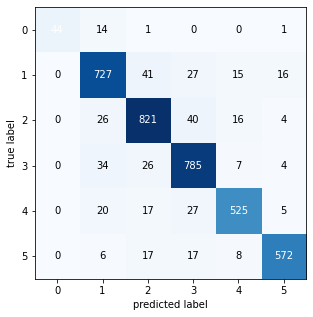

In [68]:
print('Test Accuracy using Logistics Regression Classifier: ',accuracy_score(ytest,pred_lr))

print(classification_report(ytest,pred_lr))

print(confusion_matrix(ytest,pred_lr))
CM_lr = confusion_matrix(ytest,pred_lr)

fig, ax = plot_confusion_matrix(conf_mat=CM_lr ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

f-1 score for all labels is good means model is classifying all labels correctly.

##**Multinomial-Naive Bayes Classifier** 

In [59]:
NB = MultinomialNB()
NB.fit(xv_train, ytrain)

MultinomialNB()

In [60]:
#Predition
pred_nb=NB.predict(xv_test)

Test Accuracy using Multinomial Naive-Bayes Classifier:  0.8428682371214082
              precision    recall  f1-score   support

        ABBR       1.00      0.42      0.59        60
        DESC       0.87      0.74      0.80       826
        ENTY       0.76      0.90      0.82       907
         HUM       0.83      0.89      0.86       856
         LOC       0.93      0.82      0.87       594
         NUM       0.90      0.89      0.89       620

    accuracy                           0.84      3863
   macro avg       0.88      0.78      0.81      3863
weighted avg       0.85      0.84      0.84      3863

[[ 25  25  10   0   0   0]
 [  0 615 127  46  15  23]
 [  0  27 812  50  12   6]
 [  0  12  62 764   6  12]
 [  0  21  24  38 489  22]
 [  0   9  32  23   5 551]]


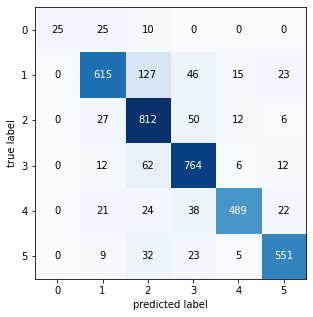

In [67]:

print('Test Accuracy using Multinomial Naive-Bayes Classifier: ',accuracy_score(ytest,pred_nb))

print(classification_report(ytest,pred_nb))

print(confusion_matrix(ytest,pred_nb))

CM_nb = confusion_matrix(ytest,pred_nb)

fig, ax = plot_confusion_matrix(conf_mat=CM_nb ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

For ABBR(Abbriviation) Naive-Bayes is giving less f1-score.

##__Support Vector Machine__

In [70]:
SVM = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
SVM.fit(xv_train, ytrain)

LinearSVC(C=0.1, class_weight='balanced', max_iter=10000, verbose=False)

In [72]:
#Predition
pred_svm=SVM.predict(xv_test)

Test Accuracy using Linear Support Vector Classifier:  0.888169816205022
              precision    recall  f1-score   support

        ABBR       0.93      0.88      0.91        60
        DESC       0.88      0.86      0.87       826
        ENTY       0.89      0.87      0.88       907
         HUM       0.87      0.89      0.88       856
         LOC       0.89      0.89      0.89       594
         NUM       0.92      0.93      0.93       620

    accuracy                           0.89      3863
   macro avg       0.90      0.89      0.89      3863
weighted avg       0.89      0.89      0.89      3863

[[ 53   6   0   0   0   1]
 [  0 713  37  26  24  26]
 [  1  33 793  52  19   9]
 [  0  38  33 765  13   7]
 [  3  18  16  21 528   8]
 [  0   6   9  17   9 579]]


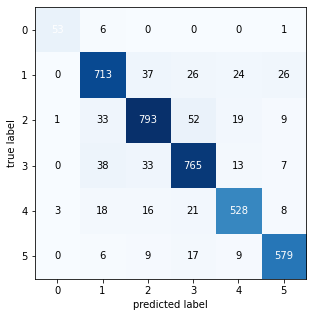

In [73]:

print('Test Accuracy using Linear Support Vector Classifier: ',accuracy_score(ytest,pred_svm))

print(classification_report(ytest,pred_svm))

print(confusion_matrix(ytest,pred_svm))

CM_svm = confusion_matrix(ytest,pred_svm)

fig, ax = plot_confusion_matrix(conf_mat=CM_svm ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

##__Gradient Boosting__

In [74]:
GBM = GradientBoostingClassifier(n_estimators=50, max_depth=10)
GBM.fit(xv_train, ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=50)

In [75]:
#Predition
pred_gbm=GBM.predict(xv_test)

Test Accuracy using Gradient Boosting Classifier:  0.8068858400207093
              precision    recall  f1-score   support

        ABBR       0.96      0.90      0.93        60
        DESC       0.61      0.93      0.74       826
        ENTY       0.87      0.71      0.78       907
         HUM       0.84      0.77      0.80       856
         LOC       0.96      0.78      0.86       594
         NUM       0.97      0.86      0.91       620

    accuracy                           0.81      3863
   macro avg       0.87      0.82      0.84      3863
weighted avg       0.84      0.81      0.81      3863

[[ 54   6   0   0   0   0]
 [  0 766  28  19   8   5]
 [  0 186 643  68   6   4]
 [  0 152  37 660   3   4]
 [  2  94  16  20 461   1]
 [  0  52  14  19   2 533]]


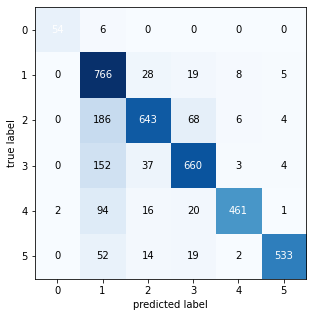

In [76]:

print('Test Accuracy using Gradient Boosting Classifier: ',accuracy_score(ytest,pred_gbm))

print(classification_report(ytest,pred_gbm))

print(confusion_matrix(ytest,pred_gbm))

CM_gbm = confusion_matrix(ytest,pred_gbm)

fig, ax = plot_confusion_matrix(conf_mat=CM_gbm ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

##__Handling Imbalance data__

__SMOTE - Oversampling Minority data__

In [109]:
df.head()

,category,sub_category,question,category_1
0,DESC,manner,serfdom develop leav russia ?,1
1,ENTY,cremat,film featur charact popey doyl ?,2
2,DESC,manner,find list celebr ' real name ?,1
3,ENTY,animal,fowl grab spotlight chine year monkey ?,2
4,ABBR,exp,full form .com ?,0


In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
x = df['question']
y = LabelEncoder().fit_transform(y)

In [110]:
# transform the dataset
strategy = {0:1500}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

In [116]:
X

<16711x4754 sparse matrix of type '<class 'numpy.float64'>'
	with 64392 stored elements in Compressed Sparse Row format>

Class=1, n=3304 (19.771%)
Class=2, n=3627 (21.704%)
Class=0, n=1500 (8.976%)
Class=3, n=3424 (20.489%)
Class=5, n=2480 (14.841%)
Class=4, n=2376 (14.218%)


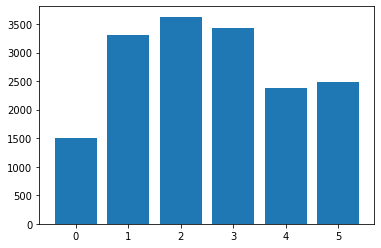

In [117]:
# summarize distribution
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [118]:
xtrain, xtest, ytrain, ytest= train_test_split(X, y, test_size=0.25, random_state= 200, shuffle= True, stratify = y)

##__Logistic Regression(OS)__

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Test Accuracy using Logistics Regression Classifier:  0.8973192915270465
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       375
           1       0.85      0.87      0.86       826
           2       0.87      0.89      0.88       907
           3       0.87      0.92      0.90       856
           4       0.92      0.90      0.91       594
           5       0.97      0.91      0.94       620

    accuracy                           0.90      4178
   macro avg       0.91      0.90      0.90      4178
weighted avg       0.90      0.90      0.90      4178

[[331  39   1   4   0   0]
 [ 10 717  54  29  15   1]
 [  0  35 811  44  11   6]
 [  0  23  31 791   4   7]
 [  0  20  16  17 537   4]
 [  0   6  18  20  14 562]]


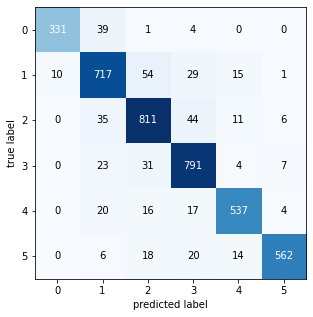

In [119]:
LR1 = LogisticRegression()
LR1.fit(xtrain,ytrain)

#Predition
pred_lr1 =LR1.predict(xtest)

print('Test Accuracy using Logistics Regression Classifier: ',accuracy_score(ytest,pred_lr1))

print(classification_report(ytest,pred_lr1))

print(confusion_matrix(ytest,pred_lr1))
CM_lr1 = confusion_matrix(ytest,pred_lr1)

fig, ax = plot_confusion_matrix(conf_mat=CM_lr1 ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

##__Multinomial -Naive Bayes(OS)__

Test Accuracy using Multinomial Naive-Bayes Classifier:  0.8580660603159407
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       375
           1       0.87      0.78      0.82       826
           2       0.81      0.88      0.84       907
           3       0.83      0.89      0.86       856
           4       0.88      0.86      0.87       594
           5       0.90      0.87      0.89       620

    accuracy                           0.86      4178
   macro avg       0.87      0.86      0.87      4178
weighted avg       0.86      0.86      0.86      4178

[[332  19  23   1   0   0]
 [  7 642  83  59  18  17]
 [  5  30 800  50  11  11]
 [  3  20  43 758  13  19]
 [  1  19  25  25 511  13]
 [  1   9  19  24  25 542]]


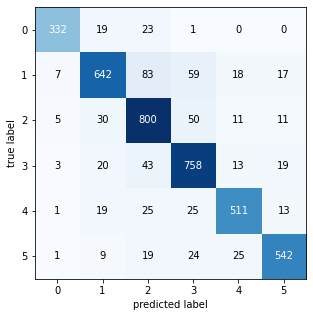

In [120]:
NB1 = MultinomialNB()
NB1.fit(xtrain, ytrain)

#Predition
pred_nb1 =NB1.predict(xtest)


print('Test Accuracy using Multinomial Naive-Bayes Classifier: ',accuracy_score(ytest,pred_nb1))

print(classification_report(ytest,pred_nb1))

print(confusion_matrix(ytest,pred_nb1))

CM_nb1 = confusion_matrix(ytest,pred_nb1)

fig, ax = plot_confusion_matrix(conf_mat=CM_nb1 ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()



##__Support Vector Machine(OS)__

Test Accuracy using Linear Support Vector Classifier:  0.88750598372427
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       375
           1       0.85      0.83      0.84       826
           2       0.87      0.87      0.87       907
           3       0.87      0.90      0.88       856
           4       0.88      0.93      0.91       594
           5       0.94      0.92      0.93       620

    accuracy                           0.89      4178
   macro avg       0.90      0.89      0.90      4178
weighted avg       0.89      0.89      0.89      4178

[[346  29   0   0   0   0]
 [ 13 689  53  38  24   9]
 [  0  41 786  51  16  13]
 [  0  29  41 768  10   8]
 [  0  17  10   9 551   7]
 [  0   4  11  15  22 568]]


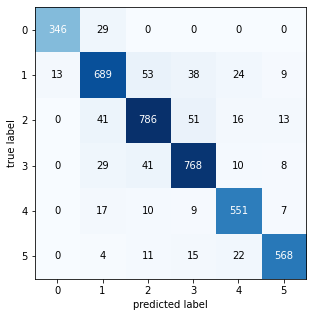

In [122]:
SVM1 = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)
SVM1.fit(xtrain, ytrain)

#Predition
pred_svm1=SVM1.predict(xtest)


print('Test Accuracy using Linear Support Vector Classifier: ',accuracy_score(ytest,pred_svm1))

print(classification_report(ytest,pred_svm1))

print(confusion_matrix(ytest,pred_svm1))

CM_svm1 = confusion_matrix(ytest,pred_svm1)

fig, ax = plot_confusion_matrix(conf_mat=CM_svm1 ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

##__Gradient Boosting (OS)__

Test Accuracy using Gradient Boosting Classifier:  0.8054092867400671
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       375
           1       0.54      0.93      0.69       826
           2       0.88      0.71      0.79       907
           3       0.92      0.71      0.80       856
           4       0.97      0.79      0.87       594
           5       0.99      0.85      0.91       620

    accuracy                           0.81      4178
   macro avg       0.88      0.82      0.84      4178
weighted avg       0.86      0.81      0.82      4178

[[351  24   0   0   0   0]
 [  7 766  25  21   7   0]
 [  0 233 645  23   4   2]
 [  0 200  41 607   2   6]
 [  0 113  11   3 467   0]
 [  0  70   9   9   3 529]]


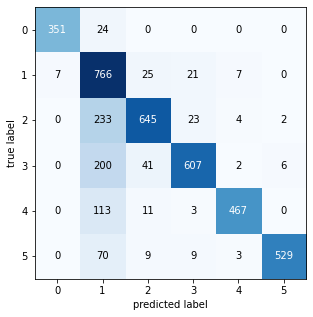

In [124]:
GBM1 = GradientBoostingClassifier(n_estimators=50, max_depth=10)
GBM1.fit(xtrain, ytrain)

#Predition
pred_gbm1=GBM1.predict(xtest)


print('Test Accuracy using Gradient Boosting Classifier: ',accuracy_score(ytest,pred_gbm1))

print(classification_report(ytest,pred_gbm1))

print(confusion_matrix(ytest,pred_gbm1))

CM_gbm1 = confusion_matrix(ytest,pred_gbm1)

fig, ax = plot_confusion_matrix(conf_mat=CM_gbm1 ,  figsize=(5, 5)) #Plotting Confusion Matrix using Heatmap
plt.show()

#__Prediction System__

ABBR - 0

DESC - 1

ENTY - 2

HUM - 3

LOC - 4

NUM - 5

In [129]:
def output_lable(n):
    if n == 0:
        return "ABBR"
    elif n == 1:
        return "DESC"
    elif n == 2:
        return "ENTY"
    elif n == 3:
        return "HUM"
    elif n == 4:
        return "LOC"
    elif n == 5:
        return "NUM"

    
def manual_testing(question):
    testing_question = {"text":[question]}
    new_def_test = pd.DataFrame(testing_question)
    new_x_test = new_def_test["text"]
    oversample = SMOTE(sampling_strategy=strategy)
    pred_lr1 =LR1.predict(xtest)
    pred_nb1 = NB1.predict(xtest)
    pred_svm1=SVM1.predict(xtest)
    pred_gbm1=GBM1.predict(xtest)

    return print("LR Prediction:{} \nNB Prediction: {} \nSVM Prediction: {} \nGBM Prediction: {}".format(output_lable(pred_lr1[0]),
                                                                                                         output_lable(pred_nb1[0]),
                                                                                                         output_lable(pred_svm1[0]),
                                                                                                         output_lable(pred_gbm1[0])))

In [134]:
question = str(input())
manual_testing(question)

Why do heavier objects travel downhill faster ?
LR Prediction:ENTY 
NB Prediction: ENTY 
SVM Prediction: ENTY 
GBM Prediction: ENTY
